# Feature creation - Numerical features ( Feature Transformation )

1. Log Transformation

Imagine you're looking at the prices of houses in a city. You might see many houses priced between $200,000 and $500,000, but then a few very expensive mansions priced at $2 million, $5 million, or even more.

If you were to plot these prices on a simple number line, the few very expensive houses would stretch the line out so much that it would be hard to see the differences between the more common, less expensive houses. It would be like having a rubber band stretched way out by a few heavy weights on one end.

Log transformation is like using a special kind of ruler that helps us see the data more clearly when there's a big difference between the small and large values.

Think of it as "squishing" the really big numbers down a bit, but not changing the order of the numbers. Smaller numbers don't get squished as much.

Here's a simple example:

Let's say we have the following house prices (in thousands of dollars):

200

300

500

1000 (which is 1 million)

5000 (which is 5 million)

The jump from 500 to 1000 is a big increase, and the jump from 1000 to 5000 is even bigger.

Now, let's imagine we apply our special "squishing" ruler (the log transformation):

Log(200) is around 2.3

Log(300) is around 2.5

Log(500) is around 2.7

Log(1000) is 3

Log(5000) is around 3.7

Notice how the differences between the "logged" numbers are now smaller and more evenly spaced, even though the original prices had huge gaps. The big jump from 1000 to 5000 in the original prices is now a much smaller jump from 3 to 3.7.

Why is this useful?

1. Easier to see patterns: When data has this kind of spread (many small values and a few very large ones), a log transformation can make it easier to see underlying patterns in the more common values.

2. Better for some calculations: Some mathematical formulas and computer models work better when the data isn't so skewed by extreme values. Log transformation can help make the data more "well-behaved" for these calculations.

In simple terms, log transformation helps us bring very large numbers closer to the smaller numbers in our data, making it easier to analyze and understand the overall picture without the extreme values dominating everything. It's like adjusting the scale so we can see both the ants and the elephants in the room more clearly.

# 1. Import necessary libraries

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Create dataset

In [38]:
# 1. House Prices in a City (in Lakhs of Rupees - as the context is ABC city)

# Imagine you have data on house prices in ABC city. This data is likely to be
# right-skewed, with many moderately priced houses and fewer very expensive ones.

house_prices_lakhs = [
    30, 45, 35, 50, 40, 25, 20, 80, 60, 32,
    42, 48, 38, 55, 41, 28, 22, 120, 95, 31,
    48, 52, 39, 65, 45, 29, 21, 150, 70, 40,
    50, 46, 33, 68, 43, 30, 23, 180, 62, 37,
    # Imagine many more data points, mostly under 70 lakhs
]

# 3. Add skewed datapoints to the dataset

In [39]:
# Let's add some higher-priced properties to create skewness
house_prices_lakhs += [250, 300, 400, 550]

In [40]:
# Create a Pandas Series
house_prices_original = pd.Series(house_prices_lakhs + list(np.random.randint(25, 70, 90)) + list(np.random.randint(70, 200, 10)),name='Original House Prices (Lakhs)')

# 4. Visualize the House prices distribution

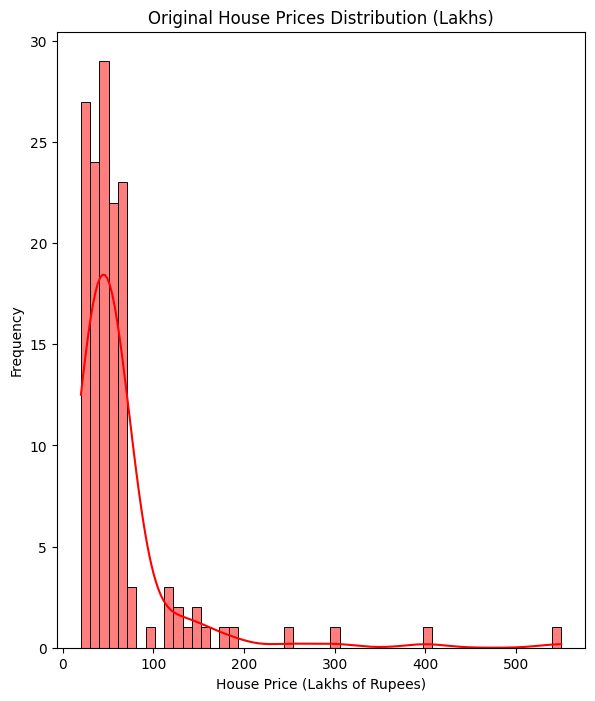

In [41]:
# Visualize the original distribution
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.histplot(house_prices_original, kde=True , color='Red')
plt.title('Original House Prices Distribution (Lakhs)')
plt.xlabel('House Price (Lakhs of Rupees)')
plt.ylabel('Frequency');

The distribution appears to be strongly right-skewed. Most of the houses are clustered at the lower end of the price range (below 100 Lakhs of Rupees), while there is a long tail extending towards higher prices.

# 5. Feature transformation using Logarithmic transformation

In [43]:
# Apply Log Transformation (using natural logarithm)
log_transformed_prices = np.log(house_prices_original)

In [44]:
log_transformed_prices = pd.Series(log_transformed_prices, name='Log of House Price')

# 6. Visualize the Log transformed feature

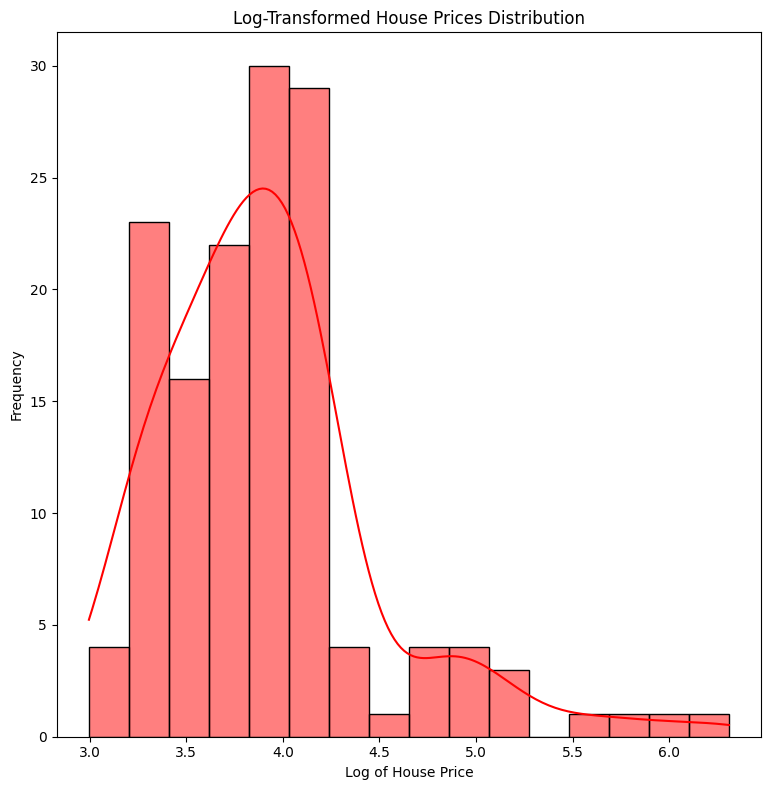

In [45]:
# Visualize the transformed distribution
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 2)
sns.histplot(log_transformed_prices, kde=True , color='Red')
plt.title('Log-Transformed House Prices Distribution')
plt.xlabel('Log of House Price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Inference : The log transformation has effectively addressed the strong right skewness present in the original house price data, resulting in a distribution that is more symmetric and closer to a normal distribution.

Mathematical Form:

1. Natural Logarithm: y' = ln(y)
2. Base-10 Logarithm: y' = log10(y)
3. Other bases are possible but less common.

When to Use:

1. Right-Skewed Data: This is the most common use case. Log transformation pulls in the long tail of the distribution, making it more symmetric.
2. Data with Multiplicative Relationships: If the relationship between variables seems multiplicative rather than additive, a log transformation can linearize it. For example, in growth models.
3. Stabilizing Variance (Heteroscedasticity): When the spread of the data increases with the mean, a log transformation can help stabilize the variance across different levels of the independent variable.
4. Transforming Ratios: Logarithms can turn ratios into differences, which can be easier to model.

How it Helps:

1. Achieving Normality: Many statistical tests assume normality. Log transformation can make the data more normally distributed, allowing for the valid use of these tests (e.g., t-tests, ANOVA).
2. Linearizing Relationships: Linear regression models assume a linear relationship between variables. Log transformation can help linearize non-linear relationships, improving the fit of the model.
3. Improving Interpretability: In some cases, working with log-transformed data can lead to more interpretable coefficients, especially when dealing with multiplicative effects (e.g., a coefficient in a log-linear model can be interpreted as a percentage change).

Important Considerations:

1. Positive Data Only: Logarithms are only defined for positive values. If your data contains zeros or negative values, you'll need to add a constant before taking the logarithm (e.g., ln(y + c) where c is a small positive number) or consider other transformations.
2. Interpretation: Remember that after the transformation, your results are in the log scale. You'll need to back-transform the results to the original scale for interpretation.

# 7. Comparing the 2 columns

In [46]:
# Create DataFrame using pd.concat()
df_concat = pd.concat([house_prices_original, log_transformed_prices], axis=1 )
df_concat

,Original House Prices (Lakhs),Log of House Price
0,30,3.401197
1,45,3.806662
2,35,3.555348
3,50,3.912023
4,40,3.688879
...,...,...
139,188,5.236442
140,132,4.882802
141,79,4.369448
142,134,4.897840


So while considering in a model we should consider the 'Log of House Price' column